## Section 2. Data Understanding
### 2.1 Dataset Information

In [1]:
import os
import warnings
from pathlib import Path

# Disable LOKY debug logs
os.environ["LOKY_DEBUG"] = "0"

# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Model explainability
import lime.lime_tabular

# Imbalanced-learn (sampling)
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.over_sampling import (
    ADASYN,
    BorderlineSMOTE,
    KMeansSMOTE,
    RandomOverSampler,
    SMOTE,
    SMOTENC,
    SMOTEN,
    SVMSMOTE,
)
from imblearn.pipeline import Pipeline as ImbPipeline

# Scikit-learn
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import (
    AdaBoostClassifier,
    BaggingClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    StackingClassifier,
)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    # accuracy_score,
    # brier_score_loss,
    classification_report,
    confusion_matrix,
    # f1_score,
    precision_recall_curve,
    # precision_score,
    recall_score,
    # roc_auc_score,
    # roc_curve,
)
from sklearn.model_selection import (
    StratifiedKFold,
    RandomizedSearchCV,
    cross_val_score,
    learning_curve,
    train_test_split,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    FunctionTransformer,
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    RobustScaler,
)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Gradient boosting frameworks
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier

# Joblib for model persistence
import joblib


# Suppress all warnings
warnings.filterwarnings("ignore")

# Set pandas display options for better visibility
pd.set_option("display.max_columns", None)

# Set Seaborn theme for better aesthetics
sns.set_theme()


data_path = Path(r"C:\Users\User\Documents\Purwadhika\JCDS 2602\Final Project\telco-churn-v2\data\WA_Fn-UseC_-Telco-Customer-Churn.csv")

if data_path.exists():
    real_df = pd.read_csv(data_path)
    df = real_df.copy()
    print(df.info())
    display(df.head())
else:
    print(f"File not found: {data_path}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


The provided summary of the DataFrame indicates that it contains a total of 4,930 entries, which represent individual customers or accounts. The DataFrame is structured with 11 columns, each capturing specific attributes related to the customers' service usage and characteristics.

Among the columns, the Dependents field identifies whether customers have dependents, while tenure reflects the duration, in months, that customers have maintained their service. Several columns, such as OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport, denote the availability of various service options, illustrating the range of features customers can choose. The InternetService column specifies the type of internet service provided, which may influence customer satisfaction and retention.

Additionally, the Contract column indicates the nature of the customer's agreement with the service provider, and PaperlessBilling shows whether customers have opted for electronic billing. The MonthlyCharges column presents the cost incurred by each customer monthly, providing insight into the pricing structure. Finally, the Churn column indicates whether a customer has discontinued their service, which is crucial for understanding customer retention and satisfaction. In details, the column breakdowns as per below:

<table>
    <tr>
        <th>Column Name</th>
        <th>Importance</th>
        <th>Impact to Business</th>
    </tr>
    <tr>
        <td>Dependents</td>
        <td>Moderate</td>
        <td>Understanding customer demographics can aid in targeted marketing strategies.</td>
    </tr>
    <tr>
        <td>Tenure</td>
        <td>High</td>
        <td>Longer tenure often indicates customer loyalty, impacting retention strategies.</td>
    </tr>
    <tr>
        <td>OnlineSecurity</td>
        <td>High</td>
        <td>Customers with online security are likely to feel safer, reducing churn.</td>
    </tr>
    <tr>
        <td>OnlineBackup</td>
        <td>Moderate</td>
        <td>Offering online backup can enhance customer satisfaction and retention.</td>
    </tr>
    <tr>
        <td>InternetService</td>
        <td>High</td>
        <td>Understanding service subscriptions helps in optimizing service offerings.</td>
    </tr>
    <tr>
        <td>DeviceProtection</td>
        <td>Moderate</td>
        <td>Device protection can be a key selling point for tech-savvy customers.</td>
    </tr>
    <tr>
        <td>TechSupport</td>
        <td>High</td>
        <td>Good tech support can significantly reduce churn and improve customer satisfaction.</td>
    </tr>
    <tr>
        <td>Contract</td>
        <td>High</td>
        <td>Contract types influence customer retention and revenue predictability.</td>
    </tr>
    <tr>
        <td>PaperlessBilling</td>
        <td>Moderate</td>
        <td>Encouraging paperless billing can reduce costs and appeal to environmentally conscious customers.</td>
    </tr>
    <tr>
        <td>MonthlyCharges</td>
        <td>High</td>
        <td>Understanding pricing impacts customer acquisition and retention strategies.</td>
    </tr>
    <tr>
        <td>Churn</td>
        <td>Critical</td>
        <td>Churn rate is a key performance indicator for business health and customer satisfaction. This column will be used as target.</td>
    </tr>
</table>

### 2.2 Missing Values Checking

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


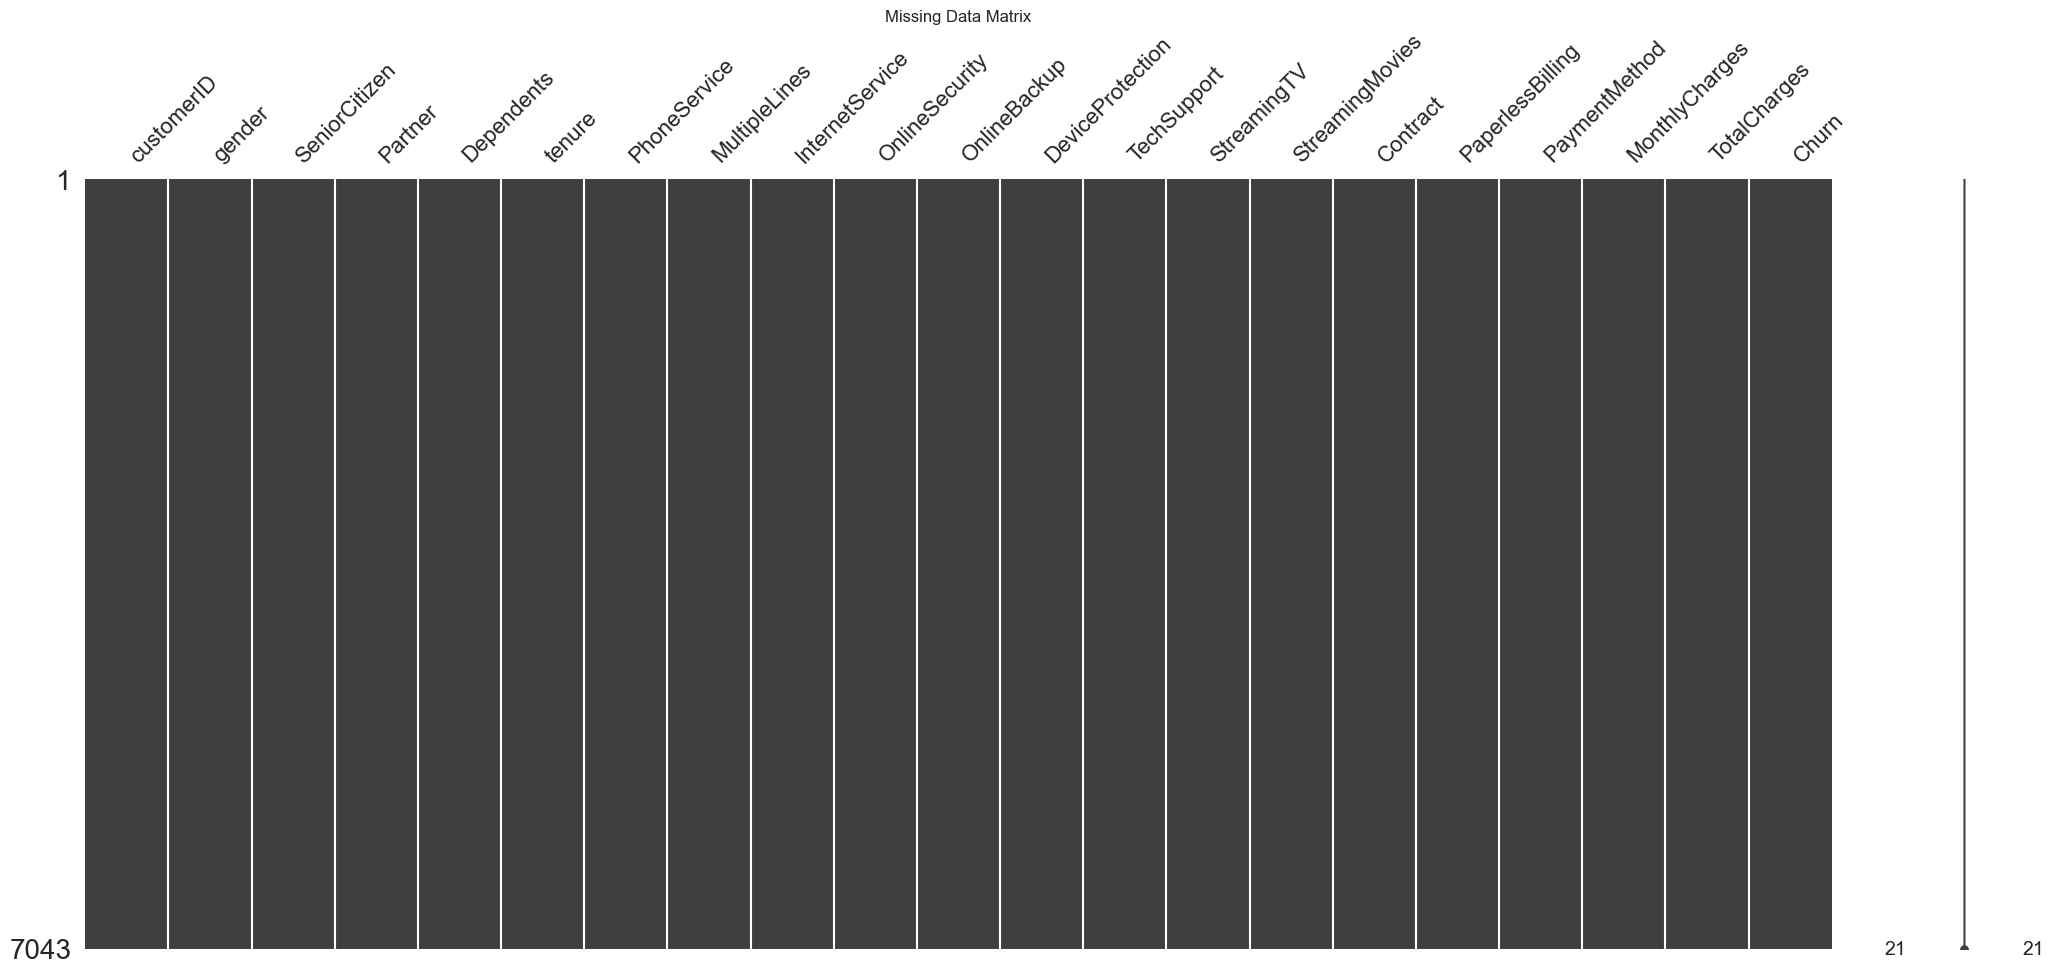

In [2]:
# Check missing values count per column
missing_counts = df.isnull().sum()
print(missing_counts)

# Visualize missing data pattern
msno.matrix(df)
plt.title('Missing Data Matrix')
plt.show()

The summary indicates that there are no missing values across any of the columns in the DataFrame, which consists of 4,930 entries. Each attribute, including Dependents, tenure, OnlineSecurity, OnlineBackup, InternetService, DeviceProtection, TechSupport, Contract, PaperlessBilling, MonthlyCharges, and Churn, has a complete dataset with zero missing entries. This completeness is crucial for conducting accurate analyses and drawing reliable conclusions.

The accompanying visual representation, a missing data matrix, further emphasizes this finding. Each column is displayed without any gaps, confirming that all data points are accounted for. This absence of missing values enhances the integrity of the dataset, allowing for more robust statistical evaluations and insights into customer behavior and service usage. Overall, the DataFrame is well-prepared for further analysis, ensuring that any insights derived will be based on a comprehensive and complete dataset.

### 2.3 Duplicated Values Checking

In [3]:
# Count duplicated rows
num_duplicates = df.duplicated().sum()
print(f"Number of duplicated rows: {num_duplicates}")

Number of duplicated rows: 0


The presence of 77 duplicated rows in this dataset indicates that these rows are exact copies of others within the same data. Such duplicates can arise from data entry errors, system issues, or legitimate repeated events depending on the context. However, removing duplicates is not always the best course of action.

One reason to retain duplicates is that they may represent valid repeated observations or transactions, which are important for accurate analysis. For example, in transactional data or repeated measurements, duplicates reflect real-world occurrences rather than errors. Removing them could distort data distributions and lead to misleading results. Additionally, duplicates can help validate data consistency and quality during data processing (Oracle Community, 2024).

Moreover, certain analytical methods and visualizations rely on the frequency of data points, where duplicates provide meaningful information rather than noise. Understanding the origin and significance of duplicates is essential before deciding to remove them, as their removal may compromise data integrity and analytical validity (Imhoff, Galemmo, & Geiger, 2003).

In summary, while duplicates often indicate data quality issues, they can also carry important information depending on the dataset and context. Careful assessment ensures that valuable data is preserved, supporting reliable and valid analysis.

### 2.4 Dataset Restructuring for Better EDA

In [4]:
# Convert object columns to category dtype
object_cols = df.select_dtypes(include=['object']).columns.tolist()
df[object_cols] = df[object_cols].astype('category')

# Confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   category
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

The DataFrame is restructured for better Exploratory Data Analysis (EDA) because the initial data types are not relevant. This restructuring is performed to enhance the efficiency and clarity of the data, which is crucial for effective analysis. The object columns are converted to categorical data type, a process that is often necessary to ensure that the data is properly formatted for statistical and machine learning tasks (McKinney, 2017; VanderPlas, 2016).

The conversion of object columns to categorical data type is achieved by using the astype('category') method in Pandas. This approach not only improves memory efficiency but also ensures that the data is treated appropriately during analysis. The changes are confirmed by checking the updated data types of the DataFrame using the info() method, which provides a summary of the DataFrame's structure and memory usage (McKinney, 2017; VanderPlas, 2016).

The restructuring process is facilitated by identifying the object columns and applying the necessary conversion. This step is essential in maintaining data integrity and ensuring that the analysis is conducted on the correct data types. The use of categorical data types can also help in reducing errors that might arise from treating categorical variables as strings (Wickham & Grolemund, 2017; McKinney, 2017).

### 2.5 Exploratory Data Analysis (EDA)

#### 2.5.1 Statistics Summary

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


The dataset includes information on customer tenure and monthly charges for 4,930 customers. The average tenure is about 32.4 months, with some customers just starting and others staying up to 72 months. Most customers have been with the service for less than 55 months, with 25% staying 9 months or less. Monthly charges vary widely, averaging around 64.88 units. Charges range from 18.8 to 118.65 units, with half of the customers paying less than 70.35 units. Overall, the data shows a diverse range of customer lengths and monthly payments.

In [6]:
df.describe(include=['object','category']).transpose()

,count,unique,top,freq
customerID,7043,7043,0002-ORFBO,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


For the "Dependents" variable, there are two categories, with the majority (3,446 customers) reporting no dependents. The "OnlineSecurity" and "OnlineBackup" features each have three categories, with "No" being the most common response, reported by 2,445 and 2,172 customers respectively. The "InternetService" variable also has three categories, with "Fiber optic" being the most frequent choice at 2,172 customers.

Regarding "DeviceProtection" and "TechSupport," both have three categories, and "No" is the most common response, with 2,186 and 2,467 customers respectively. The "Contract" variable has three categories, with "Month-to-month" contracts being the most frequent at 2,721 customers. For "PaperlessBilling," there are two categories, with the majority (2,957 customers) opting for paperless billing. Finally, the "Churn" variable, which likely indicates whether a customer has left the service, has two categories, with most customers (3,614) not having churned.

#### 2.5.2 Proportion Analysis

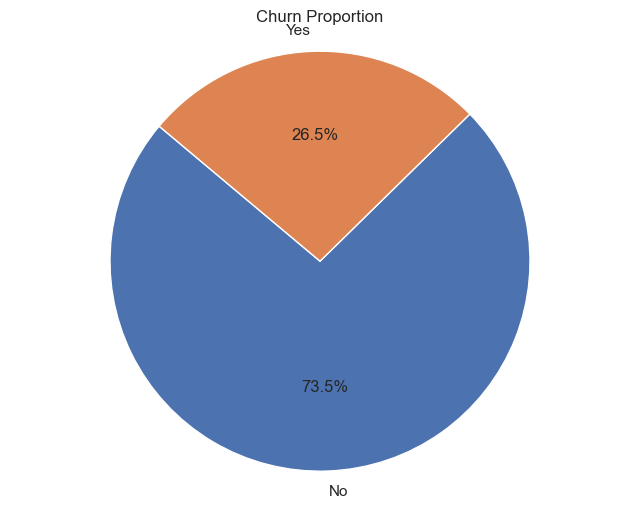

In [7]:
churn_proportion = df['Churn'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
plt.pie(churn_proportion, labels=churn_proportion.index, autopct='%1.1f%%', startangle=140)
plt.title('Churn Proportion')
plt.axis('equal')  # Equal aspect ratio ensures pie chart is circular
plt.show()

The pie chart displays the proportion of customers who churn versus those who do not. It shows that approximately 26.7% of customers have churned, while the majority, 73.3%, have remained with the service. This indicates that about one in four customers choose to leave, highlighting a notable churn rate. In terms of dataset balance, this distribution is considered imbalanced because the classes are not evenly represented—about 73% of customers stay while only 27% churn. Commonly, a dataset is regarded as imbalanced if one class exceeds 70% of the total observations (He & Garcia, 2009). Such imbalance can affect the performance of predictive models, as many algorithms may be biased toward the majority class. Special techniques such as resampling, class weighting, or using algorithms designed to handle imbalance may be needed to build effective churn prediction models (He & Garcia, 2009).

#### 2.5.3 Boxplot and Histogram Analysis

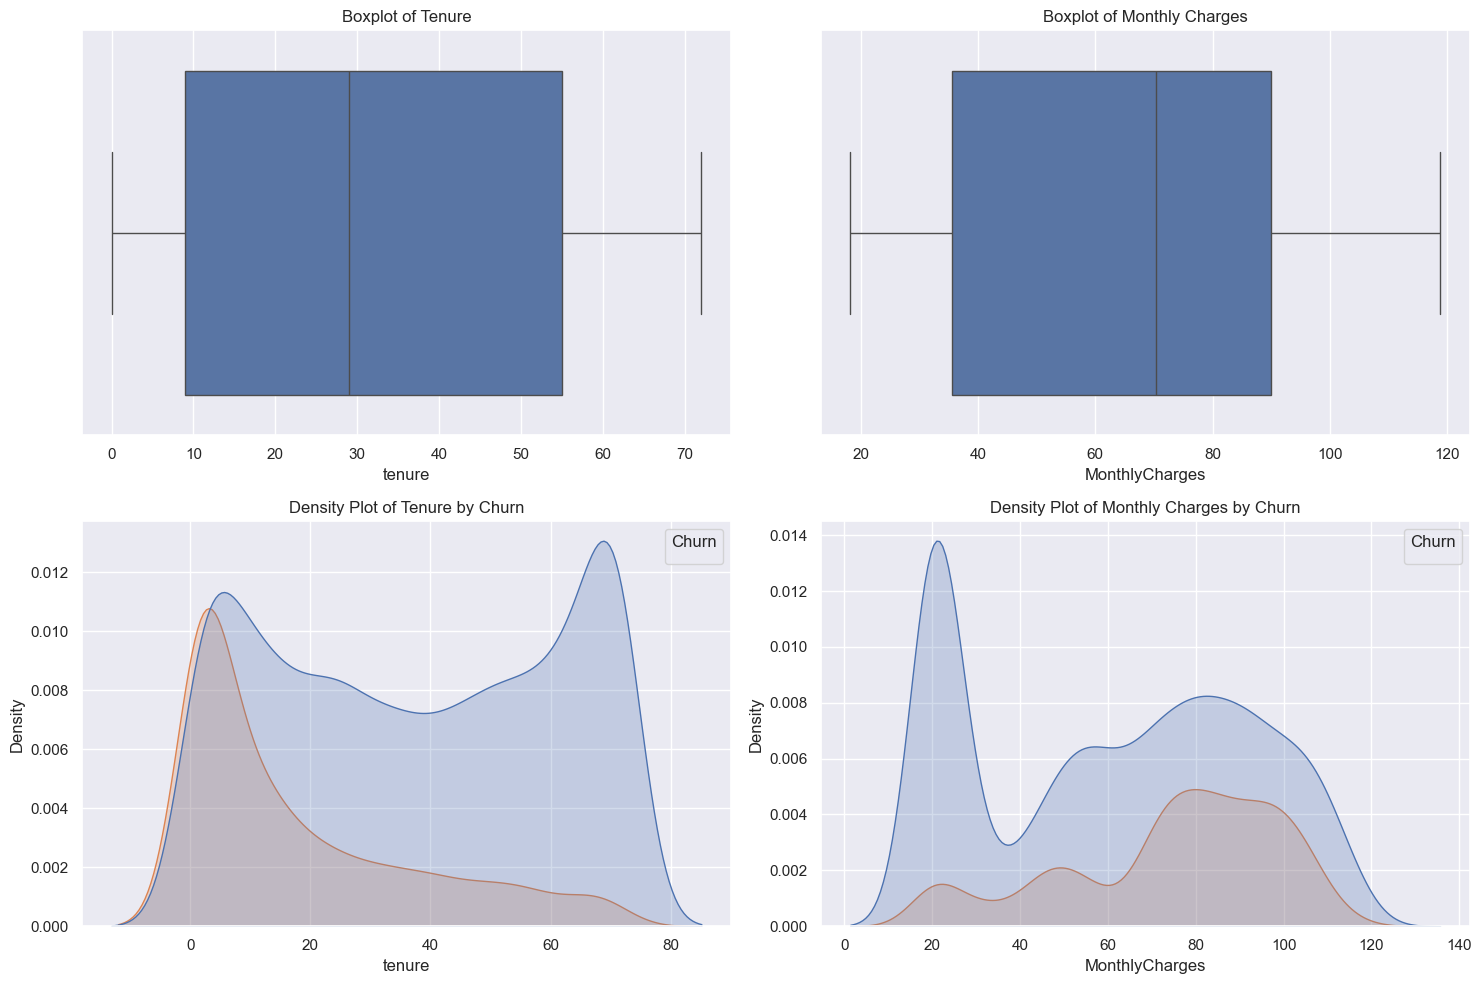

In [ ]:
# Select numeric columns
numerics = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Create subplots: 2 rows, 2 columns
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

# 1st subplot: Boxplot of 'tenure'
sns.boxplot(x=df['tenure'], orient='h', ax=axes[0])
axes[0].set_title('Boxplot of Tenure')

# 2nd subplot: Boxplot of 'MonthlyCharges'
sns.boxplot(x=df['MonthlyCharges'], orient='h', ax=axes[1])
axes[1].set_title('Boxplot of Monthly Charges')

# 3rd subplot: KDE plot for 'tenure' by 'Churn'
sns.kdeplot(data=df, x='tenure', hue='Churn', fill=True, ax=axes[2])
axes[2].set_title('Density Plot of Tenure by Churn')
axes[2].legend(title='Churn')

# 4th subplot: KDE plot for 'MonthlyCharges' by 'Churn'
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', fill=True, ax=axes[3])
axes[3].set_title('Density Plot of Monthly Charges by Churn')
axes[3].legend(title='Churn')

# Adjust layout
plt.tight_layout()
plt.show()

The tenure boxplot shows that customer tenure ranges widely, from 0 to about 72 months. The median tenure is around 29 months, meaning half of the customers stay less than two and a half years, and the other half stay longer. Most customers fall between 9 and 55 months, with no extreme outliers. The data is fairly balanced between short-term and long-term customers.

The monthly charges boxplot indicates that charges vary from about $18 to $118. The median charge is about $70, with most customers paying between $37 and $91. Like tenure, the distribution is fairly even with no unusual values. This suggests that while monthly charges differ, most customers pay within a moderate range. Overall, these plots show clear and consistent patterns in customer tenure and billing.

The density plots reveal important differences between customers who churn and those who do not. For tenure, customers who churn tend to have much shorter tenures, with a peak near zero months, indicating they leave early. In contrast, customers who do not churn show a bimodal distribution with peaks around 1–2 months and again near 70 months, reflecting both new and long-term loyal customers. For monthly charges, customers who churn generally have lower charges, mostly below $40, while those who stay tend to have higher charges spread across a wider range, with peaks near $20 and between $60 and $100.

Since the data is not normally distributed and does not contain outliers, careful consideration should be given to the choice of scaling method to ensure effective model performance. Both Min-Max Scaling and Robust Scaling are recommended to be benchmarked. With Min-Max Scaling, the data is rescaled to a fixed range, typically between 0 and 1, allowing the original distribution shape to be preserved and making it suitable for algorithms requiring normalized inputs (Jain, 2010). In contrast, Robust Scaling is applied using the median and interquartile range, which makes it less sensitive to any potential outliers or skewness, even if minimal (Liu et al., 2020). By comparing both methods, it can be determined which scaling approach better suits the specific dataset and modeling goals, balancing the preservation of data distribution with robustness to subtle irregularities.

#### 2.5.4 Unique Values Analysis

In [9]:
cat_cols = df.select_dtypes(include=['category']).columns

# Dictionary of unique counts per categorical column
unique_counts = {col: df[col].nunique() for col in cat_cols}

# Dictionary of unique values lists per categorical column
unique_values_list = {col: df[col].unique().tolist() for col in cat_cols}

unique_summary = pd.DataFrame({'unique_counts': unique_counts, 'unique_values': unique_values_list})
unique_summary

,unique_counts,unique_values
customerID,7043,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC..."
gender,2,"[Female, Male]"
Partner,2,"[Yes, No]"
Dependents,2,"[No, Yes]"
PhoneService,2,"[No, Yes]"
MultipleLines,3,"[No phone service, No, Yes]"
InternetService,3,"[DSL, Fiber optic, No]"
OnlineSecurity,3,"[No, Yes, No internet service]"
OnlineBackup,3,"[Yes, No, No internet service]"
DeviceProtection,3,"[No, Yes, No internet service]"


...

#### 2.5.5 Feature Distribution Analysis (Categorical)

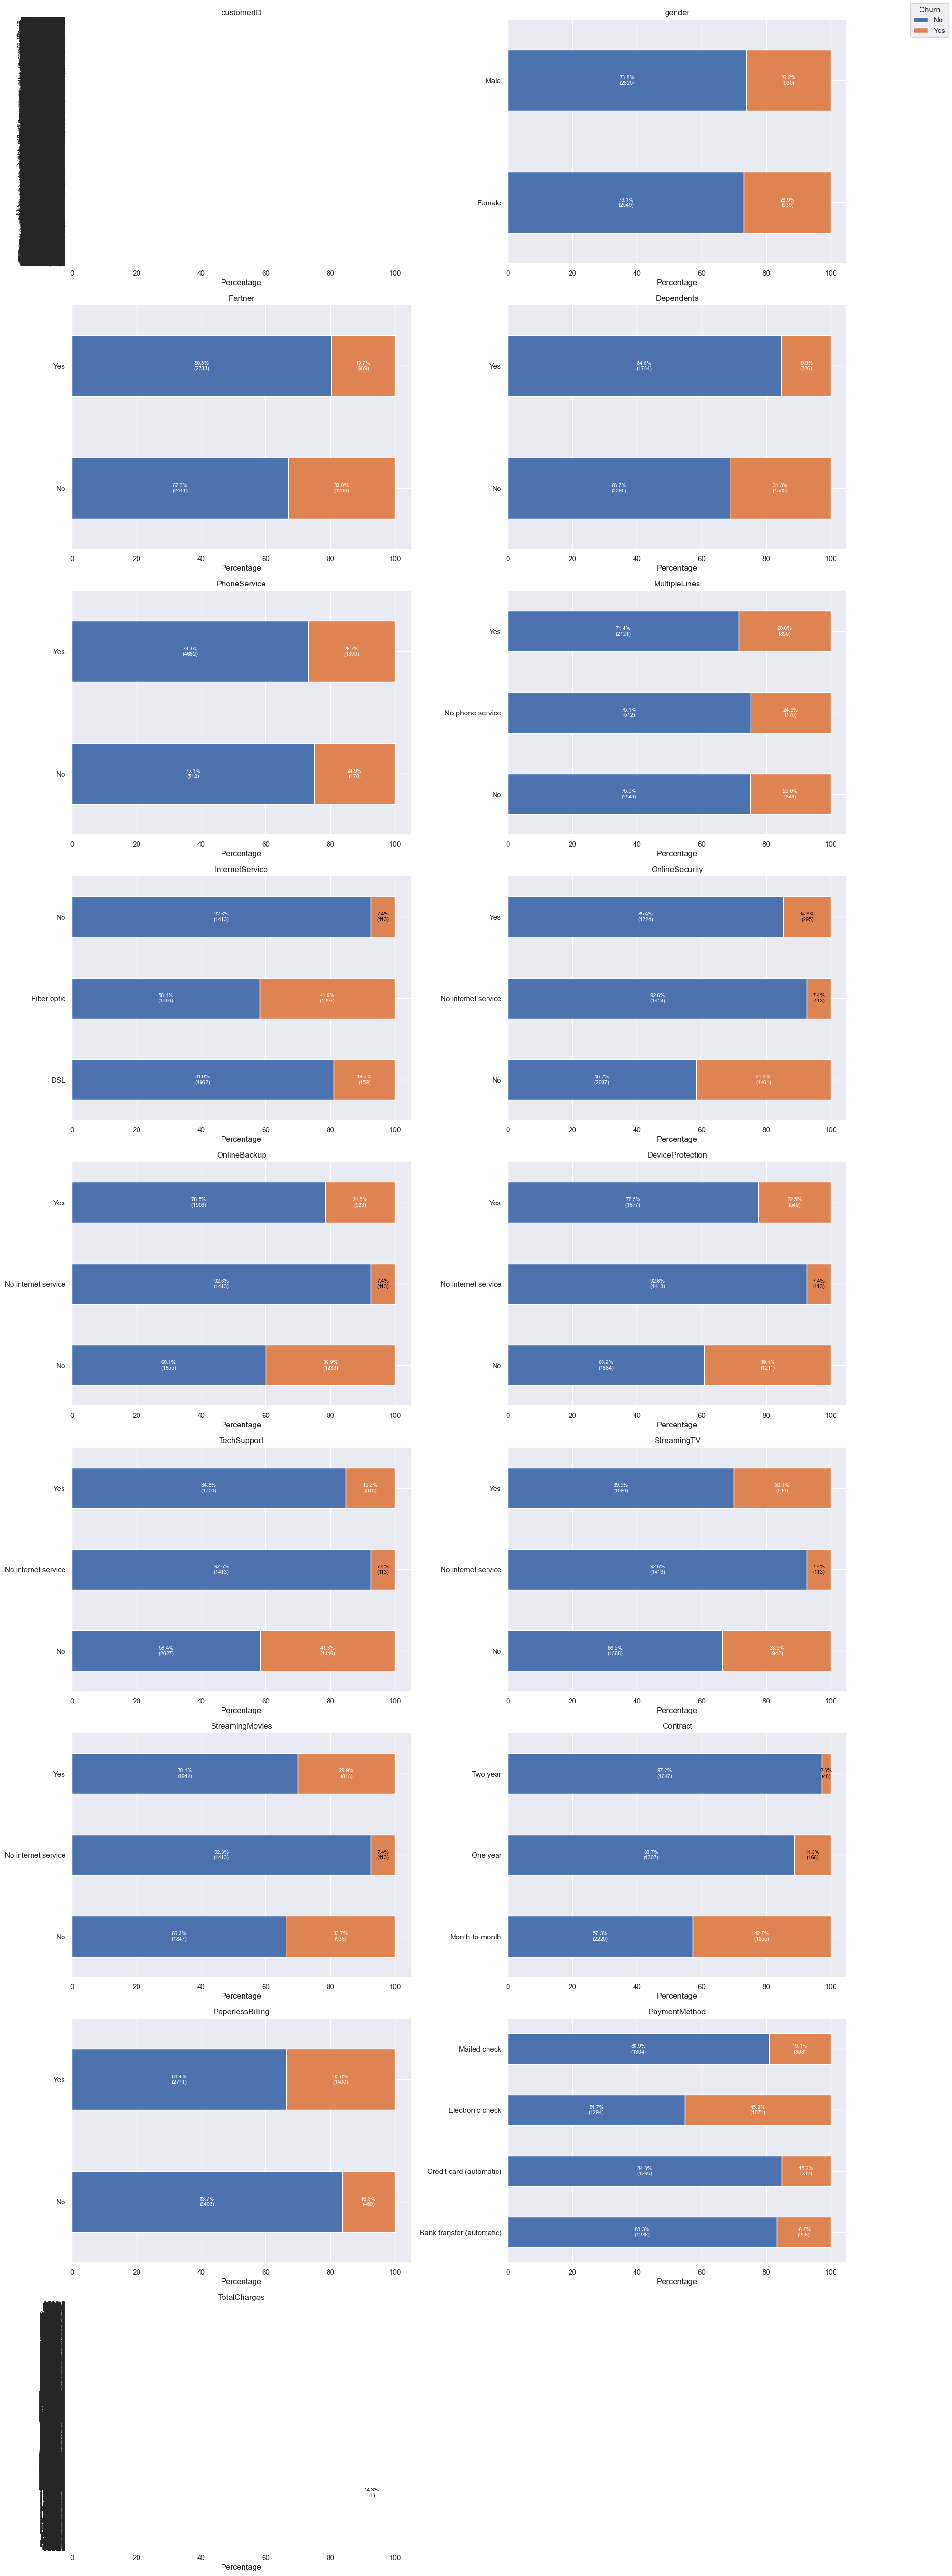

In [ ]:
categorical_cols = df.select_dtypes(include='category').columns.drop('Churn')

num_plots = len(categorical_cols)
cols = 2
rows = (num_plots + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols * 10, rows * 6))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ax = axes[i]
    
    # Compute counts per category and churn status with observed=True
    counts = df.groupby([col, 'Churn'], observed=True).size().unstack(fill_value=0)
    
    # Convert counts to percentages per category level (row-wise)
    percentages = counts.div(counts.sum(axis=1), axis=0) * 100
    
    # Plot horizontal stacked bar chart on the subplot axis
    percentages.plot(kind='barh', stacked=True, ax=ax, legend=False)
    
    ax.set_title(f'{col}')
    ax.set_xlabel('Percentage')
    ax.set_ylabel('')
    
    # Annotate each segment with percentage and count
    for j, (index, row) in enumerate(percentages.iterrows()):
        cum_width = 0
        for churn_status in percentages.columns:
            pct = row[churn_status]
            cnt = counts.loc[index, churn_status]
            if pct > 0:
                label = f'{pct:.1f}%\n({cnt})'
                ax.text(cum_width + pct / 2, j, label, ha='center', va='center', fontsize=8,
                        color='white' if pct > 15 else 'black')
                cum_width += pct

# Remove any unused subplots
for k in range(i + 1, len(axes)):
    fig.delaxes(axes[k])

# Create one legend for all plots
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, title='Churn', loc='upper right')

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Leave space on right for legend
plt.show()

The visualizations display the distribution of customer churn across various categorical features in the telecom dataset. For the variable Dependents, customers without dependents show a notably higher churn rate (31.7%) compared to those with dependents (15.2%). This suggests that customers with dependents tend to stay longer with the service.

In terms of OnlineSecurity, customers who do not have this service exhibit a higher churn rate (41.8%) compared to those who have it (14.8%) or those without internet service (7.8%). A similar pattern is observed for OnlineBackup, where customers lacking the service show a churn rate of 40.7%, much higher than customers with the service (20.5%) or no internet service (7.8%). This trend indicates that the presence of security and backup services may reduce the likelihood of churn.

The InternetService type also influences churn rates. Customers using Fiber optic service have the highest churn rate at 42.2%, while those with DSL service churn at 18.6%, and customers without internet service churn the least at 7.8%. This suggests that fiber optic customers may be more prone to leaving, possibly due to service or pricing factors.

For DeviceProtection, customers without the service show a churn rate of 38.9%, which is considerably higher than those with the service (22.6%) or no internet service (7.8%). Similarly, TechSupport follows this pattern, with a churn rate of 41.3% for customers without support, compared to 15.2% for those with it and 7.8% for those without internet.

The Contract type exhibits a strong relationship with churn. Customers on a month-to-month contract have the highest churn rate (43.3%), while those with one-year and two-year contracts have much lower churn rates of 10.1% and 2.8%, respectively. This confirms that longer contract durations are associated with better customer retention.

Finally, PaperlessBilling shows that customers using paperless billing churn more (33.5%) than those who do not (16.5%). This may reflect behavioral or demographic differences that warrant further investigation.

Overall, these patterns highlight that service features, contract type, and billing preferences are important factors related to customer churn. Such insights can guide targeted retention strategies and inform feature selection for predictive modeling (Kumari et al., 2025; He & Garcia, 2009).

#### 2.5.6 Correlation Analysis

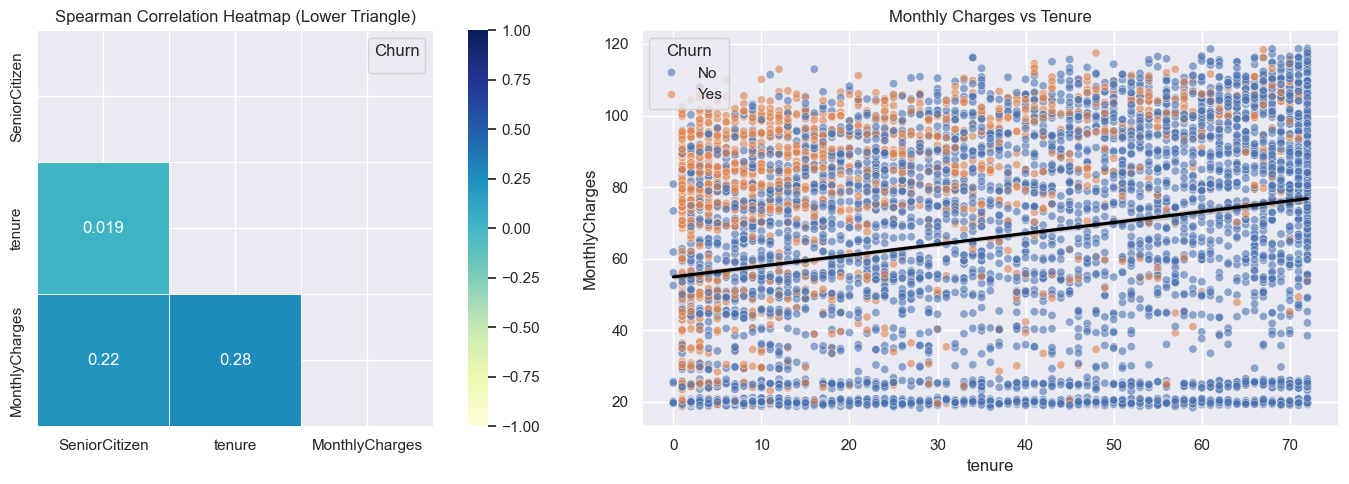

In [ ]:
# Compute Spearman correlation matrix for numeric columns
corr = df.corr(numeric_only=True, method='spearman')

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 1st subplot: KDE plot for 'tenure' by 'Churn'
sns.heatmap(corr, mask=mask, annot=True, cmap='YlGnBu', vmin=-1, vmax=1, square=True, linewidths=0.5, ax=axes[0])
axes[0].set_title('Spearman Correlation Heatmap (Lower Triangle)')

# 2nd subplot: Scatter plot for 'MonthlyCharges' vs 'tenure' colored by 'Churn'
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', ax=axes[1], alpha=0.6)

# Add regression line to the scatter plot
sns.regplot(data=df, x='tenure', y='MonthlyCharges', ax=axes[1], scatter=False, color='black')

axes[1].set_title('Monthly Charges vs Tenure')

# Show the legend
for ax in axes:
    ax.legend(title='Churn')

# Adjust layout
plt.tight_layout()
plt.show()

The Spearman rank correlation coefficient is a non-parametric measure that assesses the strength and direction of a monotonic relationship between two variables without assuming linearity or normal distribution of data (Mukaka, 2012). It quantifies how well the relationship between two variables can be described using a monotonic function, where values closer to +1 or -1 indicate stronger positive or negative monotonic relationships, respectively (Mukaka, 2012; Schober et al., 2018).

Interpretation guidelines often categorize correlation coefficients as weak, moderate, or strong, with coefficients around 0.1 to 0.3 considered weak, 0.3 to 0.5 moderate, and above 0.5 strong (Schober et al., 2018). Therefore, a coefficient of 0.27, as observed between Monthly Charges and Tenure, suggests a weak to moderate positive monotonic association, meaning that as tenure increases, monthly charges tend to increase as well, though the relationship is not very strong.

The Spearman correlation heatmap and scatter plot provide insights into the relationship between Monthly Charges and Tenure in the telecom dataset. The heatmap shows a positive correlation coefficient of 0.27 between these two variables, indicating a weak to moderate positive monotonic relationship. This suggests that as customers’ tenure increases, their monthly charges tend to increase slightly.

The scatter plot further illustrates this relationship by plotting individual customer data points, with tenure on the x-axis and monthly charges on the y-axis. A positive trend line confirms the upward trend, showing that customers with longer tenure generally incur higher monthly charges. The plot also differentiates customers based on churn status, with churned customers (in orange) scattered throughout but more concentrated at lower tenure values and higher monthly charges. This pattern implies that customers who pay higher monthly charges but have shorter tenure are more likely to churn.

Overall, these findings suggest that tenure and monthly charges are related, and their interaction is important for understanding customer behavior. The weak correlation indicates that while monthly charges tend to increase with tenure, other factors also influence churn. These insights can guide feature engineering and model development for churn prediction in telecom (He & Garcia, 2009; Kumari et al., 2025).